<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://techbarcelona.com/wp-content/uploads/nuwe-1.png", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">JOBarcelona Hackathon
</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# 1. EDA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/JOBarcelona22/

/content/drive/MyDrive/JOBarcelona22


In [4]:
import warnings

import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn import cluster           
from sklearn import decomposition  
from statistics import mode

from io import StringIO
from IPython.display import Image
from matplotlib.colors import ListedColormap

import pydotplus

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
df = pd.read_csv('train.csv')
df.head()

,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,0,22,26,119.910995,242.838324,-316.819222,250.195048,-53.547777,-112.049983,2
1,1,10,16,-90.790536,-269.470767,-182.581844,95.394941,37.291944,48.525180,0
2,2,21,42,-20.028003,-147.070212,50.280872,-90.750386,-50.476556,85.399009,1
3,3,21,17,-21.258567,0.467070,-86.164153,-21.813529,-209.256006,16.291882,0
4,4,18,16,-58.154501,-13.051195,-156.501167,48.392938,-110.008860,-10.285138,2


Observem com tenim 10 variables, però la primera és l'índex, així que ho podem eliminar.

In [6]:
del df['Unnamed: 0']

In [7]:
print("El dataset conté la següent informació:\n")
print("Shape:\n\t", df.shape)
print("\nInformació del dataset:\n")
print(df.info())

El dataset conté la següent informació:

Shape:
	 (7001, 9)

Informació del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hour               7001 non-null   int64  
 1   Minutes            7001 non-null   int64  
 2   Sensor_alpha       7001 non-null   float64
 3   Sensor_beta        7001 non-null   float64
 4   Sensor_gamma       7001 non-null   float64
 5   Sensor_alpha_plus  7001 non-null   float64
 6   Sensor_beta_plus   7001 non-null   float64
 7   Sensor_gamma_plus  7001 non-null   float64
 8   Insect             7001 non-null   int64  
dtypes: float64(6), int64(3)
memory usage: 492.4 KB
None


Les altres variables són numériques, però la variable Insect és categòrica.

Anem a analitzar si hi ha valors null i outliers.

In [8]:
check_for_nan_df = df.isnull().any().any()
print("Existeix algun valor null al nostre df DatFrame?",check_for_nan_df)

Existeix algun valor null al nostre df DatFrame? False


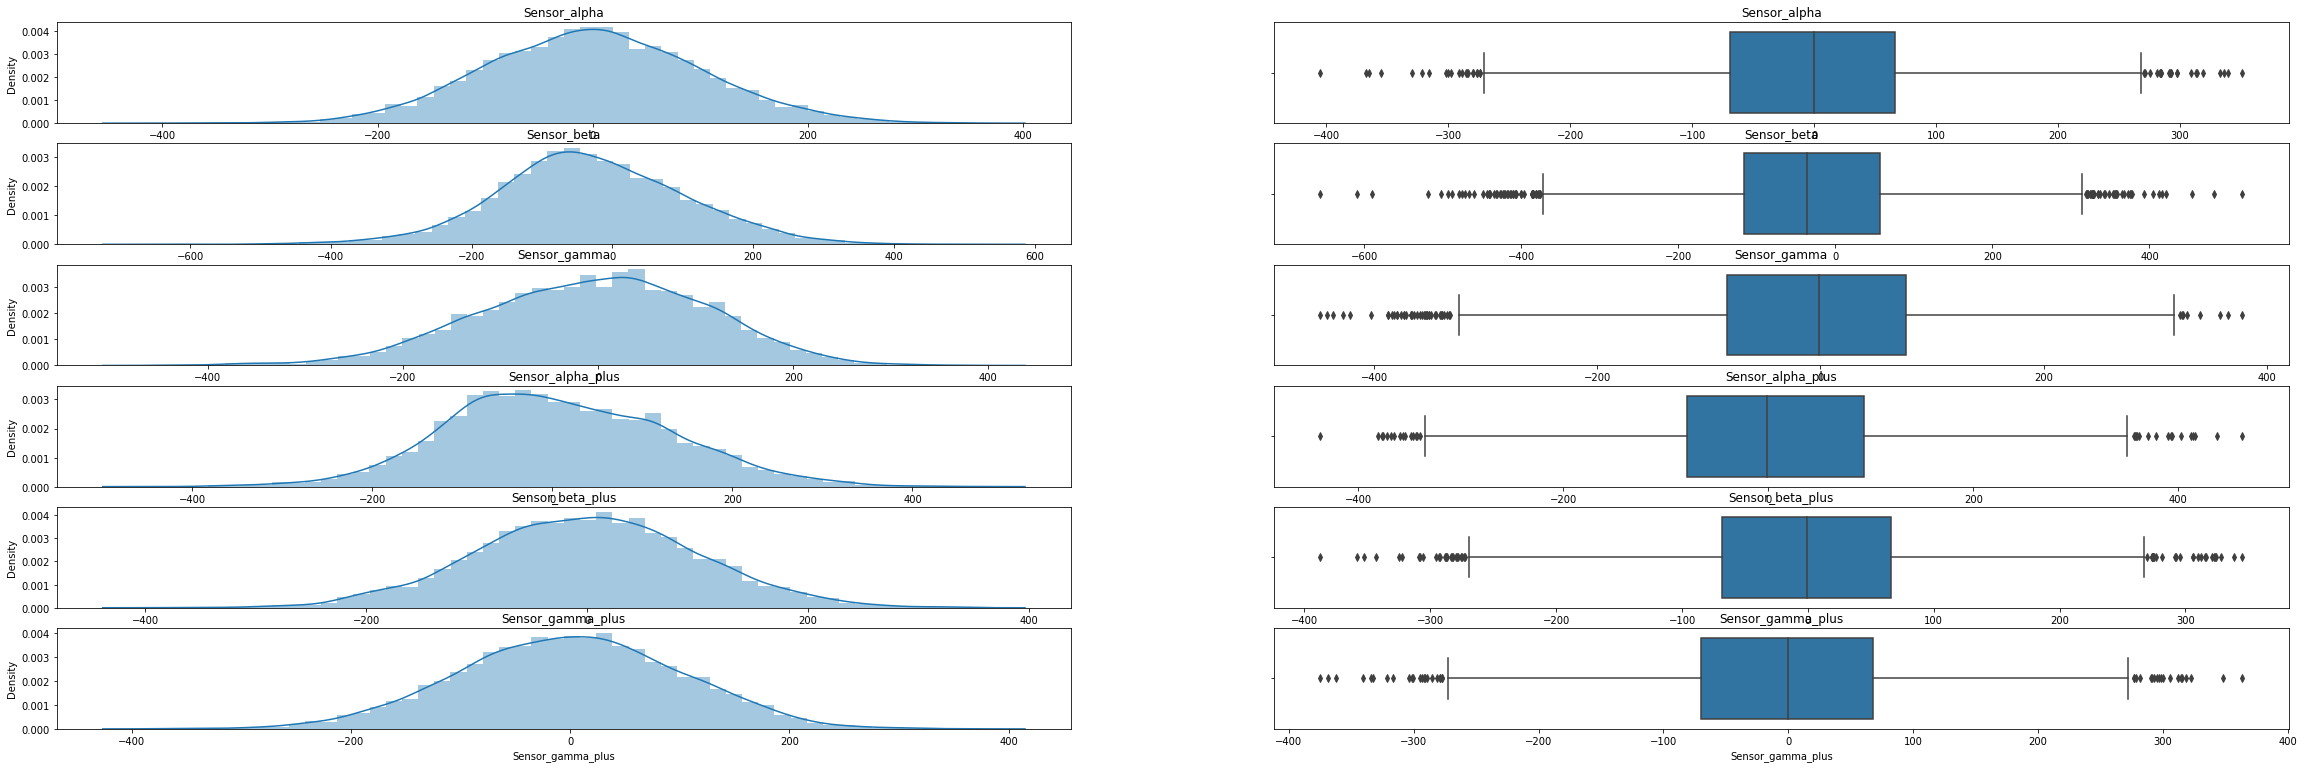

In [9]:
warnings.filterwarnings('ignore')

plt.figure(figsize=(40, 13))
plt.subplot(6, 2, 1)
sns.distplot(df['Sensor_alpha'])
plt.title('Sensor_alpha')
plt.subplot(6, 2, 2)
sns.boxplot(df['Sensor_alpha'])
plt.title('Sensor_alpha')
plt.subplot(6, 2, 3)
sns.distplot(df['Sensor_beta'])
plt.title('Sensor_beta')
plt.subplot(6, 2, 4)
sns.boxplot(df['Sensor_beta'])
plt.title('Sensor_beta')
plt.subplot(6, 2, 5)
sns.distplot(df['Sensor_gamma'])
plt.title('Sensor_gamma')
plt.subplot(6, 2, 6)
sns.boxplot(df['Sensor_gamma'])
plt.title('Sensor_gamma')
plt.subplot(6, 2, 7)
sns.distplot(df['Sensor_alpha_plus'])
plt.title('Sensor_alpha_plus')
plt.subplot(6, 2, 8)
sns.boxplot(df['Sensor_alpha_plus'])
plt.title('Sensor_alpha_plus')
plt.subplot(6, 2, 9)
sns.distplot(df['Sensor_beta_plus'])
plt.title('Sensor_beta_plus')
plt.subplot(6, 2, 10)
sns.boxplot(df['Sensor_beta_plus'])
plt.title('Sensor_beta_plus')
plt.subplot(6, 2, 11)
sns.distplot(df['Sensor_gamma_plus'])
plt.title('Sensor_gamma_plus')
plt.subplot(6, 2, 12)
sns.boxplot(df['Sensor_gamma_plus'])
plt.title('Sensor_gamma_plus')
plt.show()

Veiem com segueixen una distribució normal, però tenim outliers que haurem de tractar.

In [10]:
upper_Sensor_alpha = df['Sensor_alpha'].mean()+3*(df['Sensor_alpha'].quantile(.75)-df['Sensor_alpha'].quantile(.25))
lower_Sensor_alpha = df['Sensor_alpha'].mean()-3*(df['Sensor_alpha'].quantile(.75)-df['Sensor_alpha'].quantile(.25))

upper_Sensor_beta = df['Sensor_beta'].mean()+3*(df['Sensor_beta'].quantile(.75)-df['Sensor_beta'].quantile(.25))
lower_Sensor_beta = df['Sensor_beta'].mean()-3*(df['Sensor_beta'].quantile(.75)-df['Sensor_beta'].quantile(.25))

upper_Sensor_gamma = df['Sensor_gamma'].mean()+3*(df['Sensor_gamma'].quantile(.75)-df['Sensor_gamma'].quantile(.25))
lower_Sensor_gamma = df['Sensor_gamma'].mean()-3*(df['Sensor_gamma'].quantile(.75)-df['Sensor_gamma'].quantile(.25))

upper_Sensor_alpha_plus = df['Sensor_alpha_plus'].mean()+3*(df['Sensor_alpha_plus'].quantile(.75)-df['Sensor_alpha_plus'].quantile(.25))
lower_Sensor_alpha_plus = df['Sensor_alpha_plus'].mean()-3*(df['Sensor_alpha_plus'].quantile(.75)-df['Sensor_alpha_plus'].quantile(.25))

upper_Sensor_beta_plus = df['Sensor_beta_plus'].mean()+3*(df['Sensor_beta_plus'].quantile(.75)-df['Sensor_beta_plus'].quantile(.25))
lower_Sensor_beta_plus = df['Sensor_beta_plus'].mean()-3*(df['Sensor_beta_plus'].quantile(.75)-df['Sensor_beta_plus'].quantile(.25))

upper_Sensor_gamma_plus = df['Sensor_gamma_plus'].mean()+3*(df['Sensor_gamma_plus'].quantile(.75)-df['Sensor_gamma_plus'].quantile(.25))
lower_Sensor_gamma_plus = df['Sensor_gamma_plus'].mean()-3*(df['Sensor_gamma_plus'].quantile(.75)-df['Sensor_gamma_plus'].quantile(.25))

In [11]:
for idx, i in enumerate(df['Sensor_alpha']):
    if i > upper_Sensor_alpha:
        df['Sensor_alpha'][idx] = df['Sensor_alpha'].mean()
    elif i < lower_Sensor_alpha:
        df['Sensor_alpha'][idx] = df['Sensor_alpha'].mean()

for idx, i in enumerate(df['Sensor_beta']):
    if i > upper_Sensor_beta:
        df['Sensor_beta'][idx] = df['Sensor_beta'].mean()
    elif i < lower_Sensor_beta:
        df['Sensor_beta'][idx] = df['Sensor_beta'].mean()

for idx, i in enumerate(df['Sensor_gamma']):
    if i > upper_Sensor_gamma:
        df['Sensor_gamma'][idx] = df['Sensor_gamma'].mean()
    elif i < lower_Sensor_gamma:
        df['Sensor_gamma'][idx] = df['Sensor_gamma'].mean()

for idx, i in enumerate(df['Sensor_alpha_plus']):
    if i > upper_Sensor_alpha_plus:
        df['Sensor_alpha_plus'][idx] = df['Sensor_alpha_plus'].mean()
    elif i < lower_Sensor_alpha_plus:
        df['Sensor_alpha_plus'][idx] = df['Sensor_alpha_plus'].mean()

for idx, i in enumerate(df['Sensor_beta_plus']):
    if i > upper_Sensor_beta_plus:
        df['Sensor_beta_plus'][idx] = df['Sensor_beta_plus'].mean()
    elif i < lower_Sensor_beta_plus:
        df['Sensor_beta_plus'][idx] = df['Sensor_beta_plus'].mean()

for idx, i in enumerate(df['Sensor_gamma_plus']):
    if i > upper_Sensor_gamma_plus:
        df['Sensor_gamma_plus'][idx] = df['Sensor_gamma_plus'].mean()
    elif i < lower_Sensor_gamma_plus:
        df['Sensor_gamma_plus'][idx] = df['Sensor_gamma_plus'].mean()

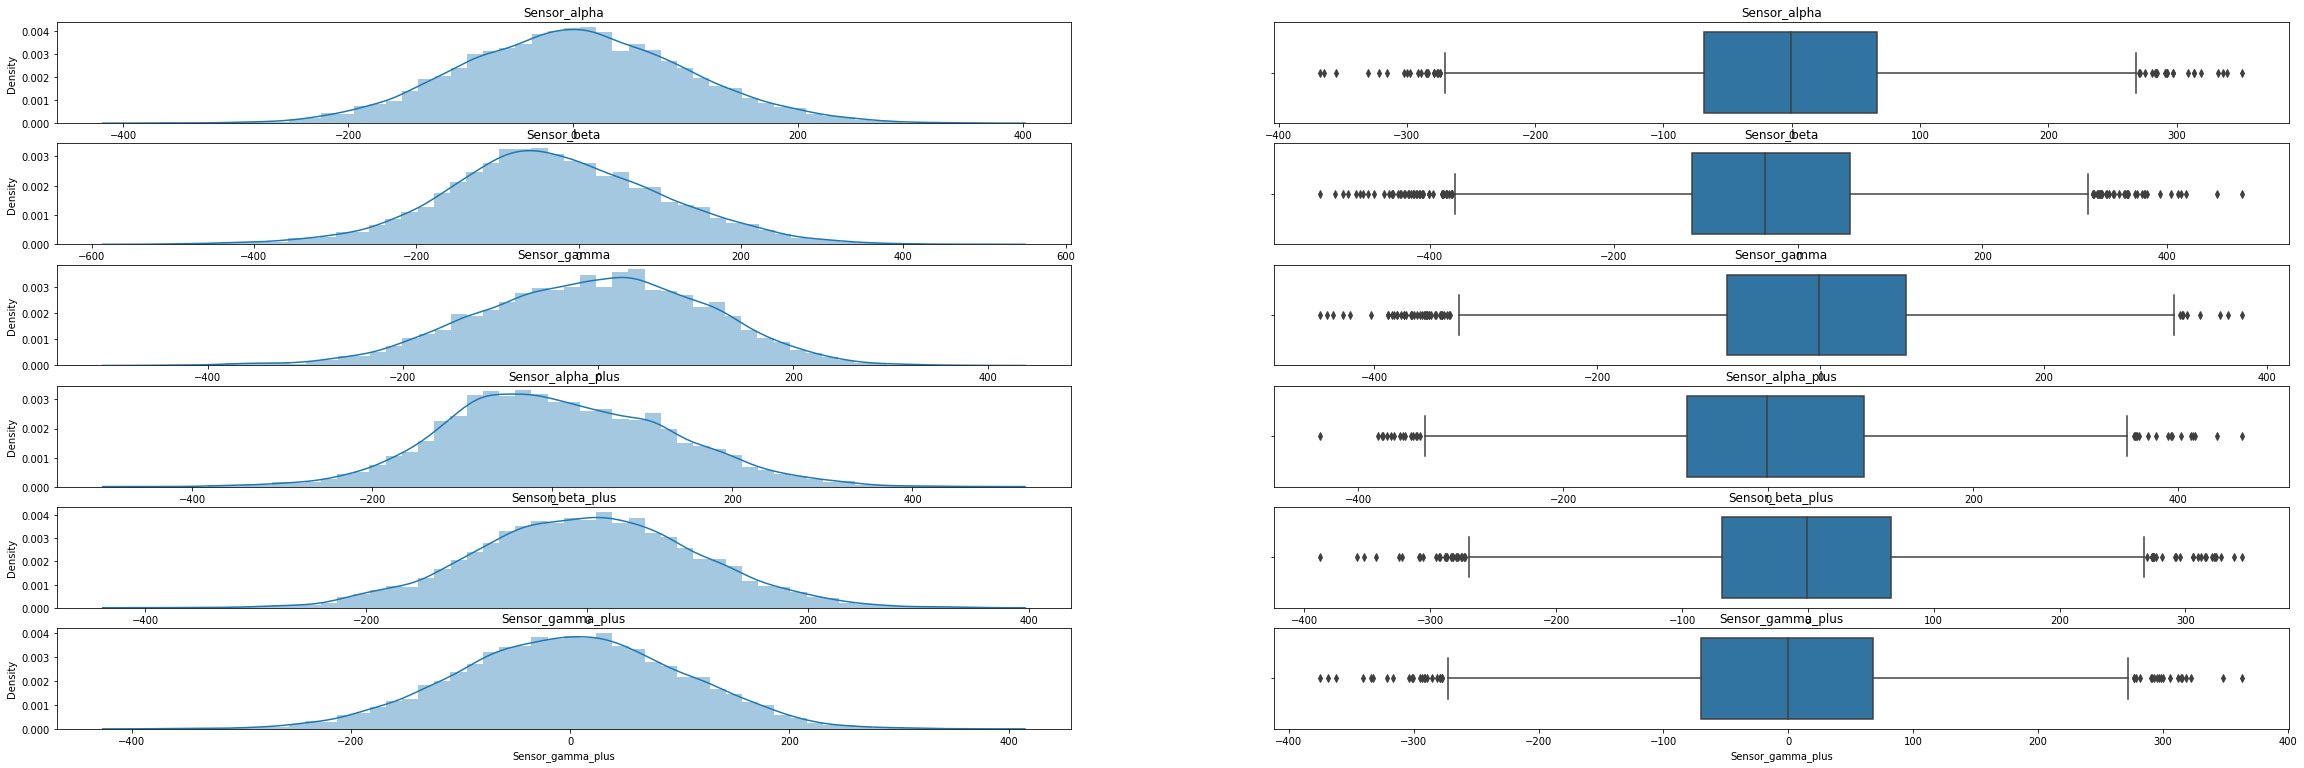

In [12]:
warnings.filterwarnings('ignore')

plt.figure(figsize=(40, 13))
plt.subplot(6, 2, 1)
sns.distplot(df['Sensor_alpha'])
plt.title('Sensor_alpha')
plt.subplot(6, 2, 2)
sns.boxplot(df['Sensor_alpha'])
plt.title('Sensor_alpha')
plt.subplot(6, 2, 3)
sns.distplot(df['Sensor_beta'])
plt.title('Sensor_beta')
plt.subplot(6, 2, 4)
sns.boxplot(df['Sensor_beta'])
plt.title('Sensor_beta')
plt.subplot(6, 2, 5)
sns.distplot(df['Sensor_gamma'])
plt.title('Sensor_gamma')
plt.subplot(6, 2, 6)
sns.boxplot(df['Sensor_gamma'])
plt.title('Sensor_gamma')
plt.subplot(6, 2, 7)
sns.distplot(df['Sensor_alpha_plus'])
plt.title('Sensor_alpha_plus')
plt.subplot(6, 2, 8)
sns.boxplot(df['Sensor_alpha_plus'])
plt.title('Sensor_alpha_plus')
plt.subplot(6, 2, 9)
sns.distplot(df['Sensor_beta_plus'])
plt.title('Sensor_beta_plus')
plt.subplot(6, 2, 10)
sns.boxplot(df['Sensor_beta_plus'])
plt.title('Sensor_beta_plus')
plt.subplot(6, 2, 11)
sns.distplot(df['Sensor_gamma_plus'])
plt.title('Sensor_gamma_plus')
plt.subplot(6, 2, 12)
sns.boxplot(df['Sensor_gamma_plus'])
plt.title('Sensor_gamma_plus')
plt.show()

Hem eliminat els valors extrems i ara anem a analitzar l'assimetria.

In [13]:
from scipy import stats
import math 

for i in df:
  if (i != 'Hour' and i != 'Minutes' and i != 'Insect'):
    kurt = stats.kurtosis(df[i])
    print("El valor de kurtosis de la variable", i, "és:", kurt)
    if (kurt > -1 and kurt < 1):
      print("Valor entre paràmetres -1 i 1, no hi ha assimetria o molt poca\n")

El valor de kurtosis de la variable Sensor_alpha és: -0.026331190646078806
Valor entre paràmetres -1 i 1, no hi ha assimetria o molt poca

El valor de kurtosis de la variable Sensor_beta és: 0.23047465354461627
Valor entre paràmetres -1 i 1, no hi ha assimetria o molt poca

El valor de kurtosis de la variable Sensor_gamma és: -0.013638583841256047
Valor entre paràmetres -1 i 1, no hi ha assimetria o molt poca

El valor de kurtosis de la variable Sensor_alpha_plus és: -0.08476868068219456
Valor entre paràmetres -1 i 1, no hi ha assimetria o molt poca

El valor de kurtosis de la variable Sensor_beta_plus és: 0.004310667499602072
Valor entre paràmetres -1 i 1, no hi ha assimetria o molt poca

El valor de kurtosis de la variable Sensor_gamma_plus és: -0.08151155299300505
Valor entre paràmetres -1 i 1, no hi ha assimetria o molt poca



Observem com els paràmetres estan dintre del previst, així que podem afirmar que hi ha normalitat, tot i això anem a realitzar el test de normalitat.

In [14]:
for i in df:
  if (i != 'Hour' and i != 'Minutes' and i != 'Insect'):
    shap = stats.shapiro(df[i])
    print("El pvalue del test Shapiro de la variable", i, "és:", shap[1])
    if (shap[1] > 0.05):
      print("S'accepta la normalitat de la variable\n")
    else:
      print("No s'accepta la normalitat de la variable.\n")

El pvalue del test Shapiro de la variable Sensor_alpha és: 0.11927196383476257
S'accepta la normalitat de la variable

El pvalue del test Shapiro de la variable Sensor_beta és: 9.360086039578164e-08
No s'accepta la normalitat de la variable.

El pvalue del test Shapiro de la variable Sensor_gamma és: 8.868022288721633e-11
No s'accepta la normalitat de la variable.

El pvalue del test Shapiro de la variable Sensor_alpha_plus és: 2.378135362246514e-11
No s'accepta la normalitat de la variable.

El pvalue del test Shapiro de la variable Sensor_beta_plus és: 0.838548481464386
S'accepta la normalitat de la variable

El pvalue del test Shapiro de la variable Sensor_gamma_plus és: 0.2672865688800812
S'accepta la normalitat de la variable



S'accepta la normalitat en 3 de les 6 variables, així que utilitzem la normalització minmax per veure si aconseguim normalitzar-ho tot.

In [15]:
#log normalization

def minmax_insect(df):
  minmax = df.copy()
  for i in df.columns:
    if (i != 'Hour' and i != 'Minutes' and i != 'Insect'): 
      max_value = max(df[i])
      min_value = min(df[i])
      minmax[i] = (df[i] - min_value)/(max_value - min_value)
  return minmax

In [16]:
minmax = minmax_insect(df)
minmax.head()

,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus,Insect
0,22,26,0.678181,0.760867,0.159234,0.763981,0.455784,0.355938,2
1,10,16,0.385079,0.249023,0.321586,0.591935,0.579738,0.573330,0
2,21,42,0.483515,0.371312,0.603220,0.385052,0.459975,0.623251,1
3,21,17,0.481803,0.518716,0.438198,0.461669,0.243313,0.529692,0
4,18,16,0.430478,0.505210,0.353129,0.539697,0.378740,0.493711,2


In [17]:
for i in minmax:
  if (i != 'Hour' and i != 'Minutes' and i != 'Insect'):
    ntest = stats.normaltest(df[i])
    print("El pvalue del test Shapiro de la variable", i, "és:", ntest[1])
    if (ntest[1] > 0.05):
      print("S'accepta la normalitat de la variable\n")
    else:
      print("No s'accepta la normalitat de la variable.\n")

El pvalue del test Shapiro de la variable Sensor_alpha és: 0.09039146610442768
S'accepta la normalitat de la variable

El pvalue del test Shapiro de la variable Sensor_beta és: 0.0002035480172042928
No s'accepta la normalitat de la variable.

El pvalue del test Shapiro de la variable Sensor_gamma és: 8.360924283344157e-12
No s'accepta la normalitat de la variable.

El pvalue del test Shapiro de la variable Sensor_alpha_plus és: 3.921011278185588e-08
No s'accepta la normalitat de la variable.

El pvalue del test Shapiro de la variable Sensor_beta_plus és: 0.9453925889992598
S'accepta la normalitat de la variable

El pvalue del test Shapiro de la variable Sensor_gamma_plus és: 0.15850235903680496
S'accepta la normalitat de la variable



Els resultats són similars, així que afluixem les restriccions i diem que d'acord amb el Teorema del Límit Central hi ha normalitat en totes les variables.

A continuació anem a veure l'EDA per tipus d'insecte.

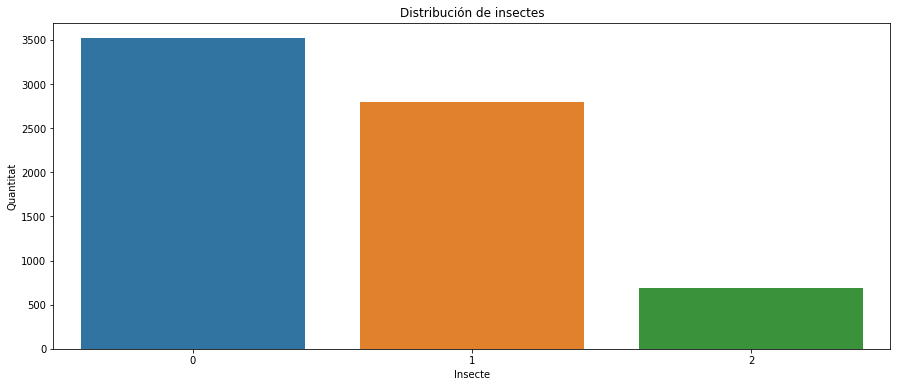

In [18]:
plt.figure(figsize=(15, 6))
sns.countplot(x=df['Insect'], data=df)
plt.title("Distribución de insectes")
plt.ylabel("Quantitat")
plt.xlabel("Insecte")
plt.show()

El tipus d'insecte que més es repeteix és el tipus 0, seguit de l'1, i finalment el 2.

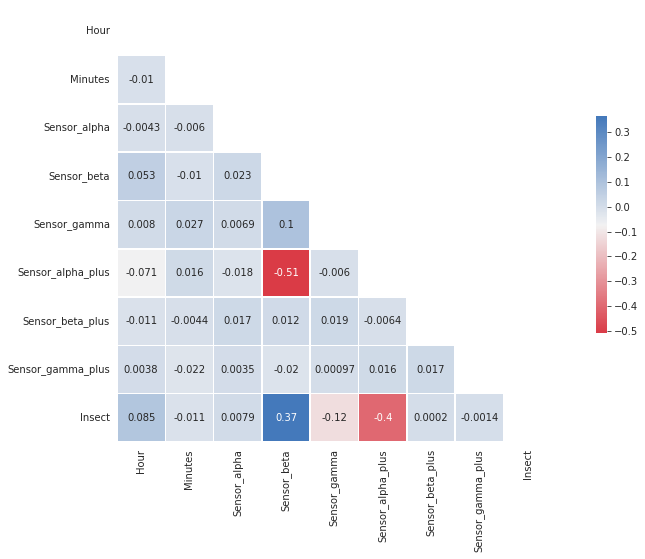

In [19]:
correl = df.corr()

mask = np.triu(np.ones_like(correl, dtype=bool))
cmap = sns.diverging_palette(10, 250, as_cmap = True)

plt.figure(figsize=(16,8))
sns.set_style(style='white')
sns.heatmap(correl, annot=True, annot_kws = {"size": 10}, cbar_kws={"shrink": .5}, mask = mask, square = True, cmap = cmap, linewidths=.5)
plt.show()

Fent un anàlisi de correlació observem com les variables que més afecten a la tipologia d'insecte és Sensor_beta, Sensor_alpha_plus i Sensor_gamma.

In [20]:
s0 = df[df['Insect'] == 0]
s1 = df[df['Insect'] == 1]
s2 = df[df['Insect'] == 2]

In [21]:
def insect_segment(segment, df, n):
    """
    Funció de proporció de insectes.
    q -> es el DataFrame de la qualitat
    df -> es el dataframe total
    n -> es el numero del segment a analizar
    """
    print("La proporció del segment {} respecte del total de qualitats es del {} %"
          .format(n, round((len(segment)/len(df))*100, 2)))

In [22]:
insect_segment(s0, df, 0)
insect_segment(s1, df, 1)
insect_segment(s2, df, 2)

La proporció del segment 0 respecte del total de qualitats es del 50.26 %
La proporció del segment 1 respecte del total de qualitats es del 39.89 %
La proporció del segment 2 respecte del total de qualitats es del 9.84 %


L'insecte predominant és el tipus 0 amb més d'un 50% d'observacions.

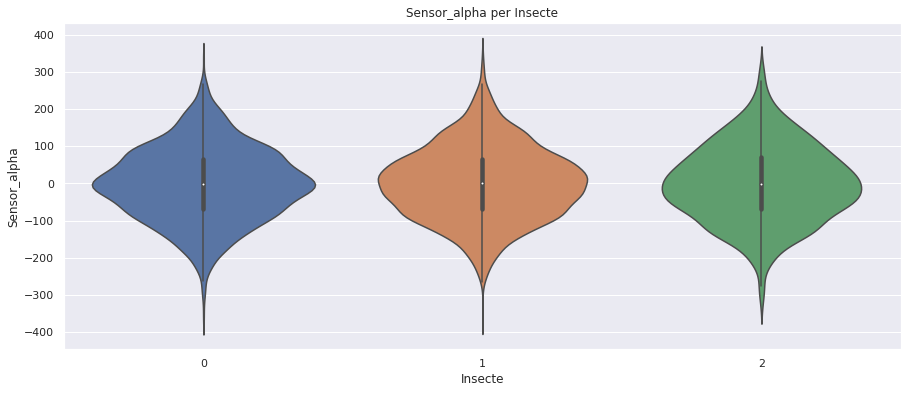

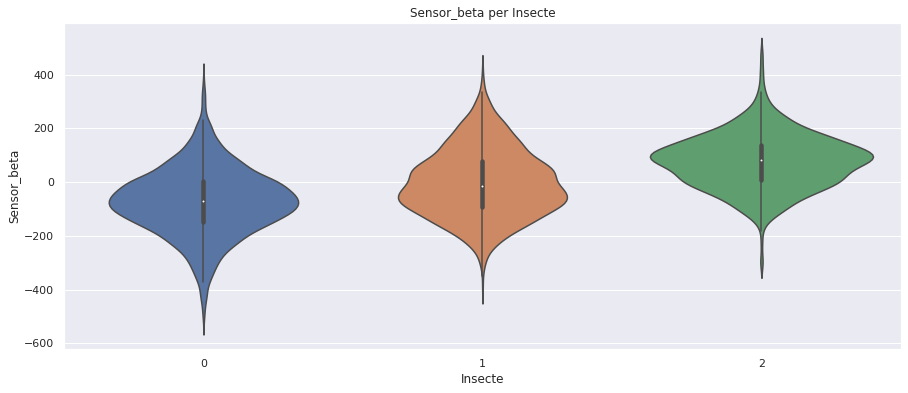

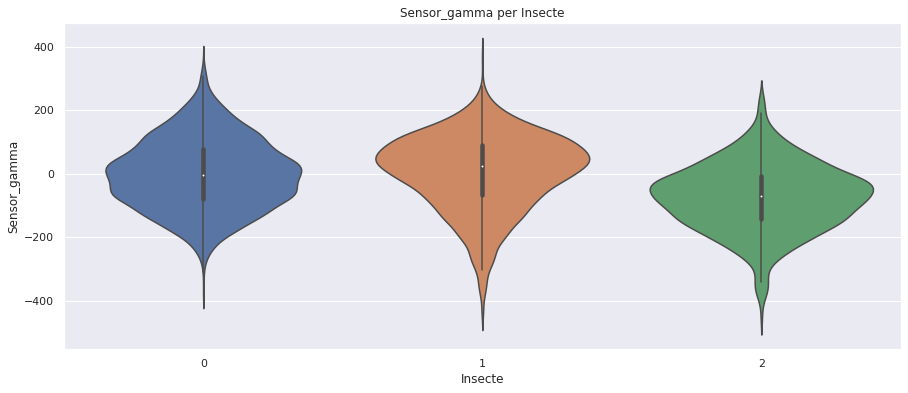

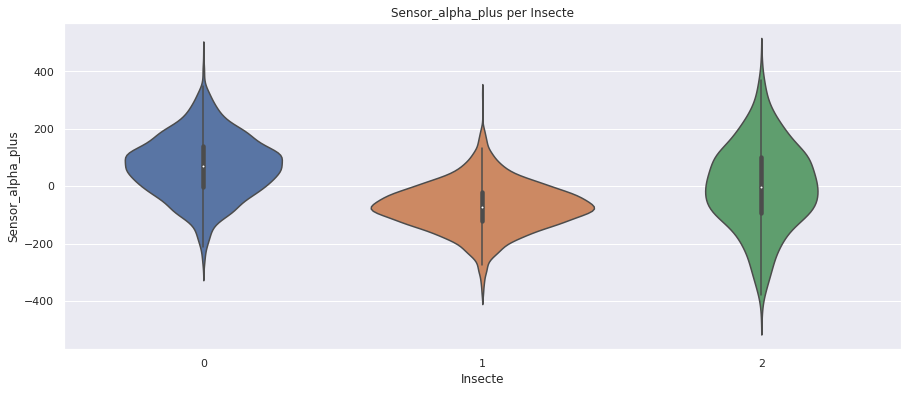

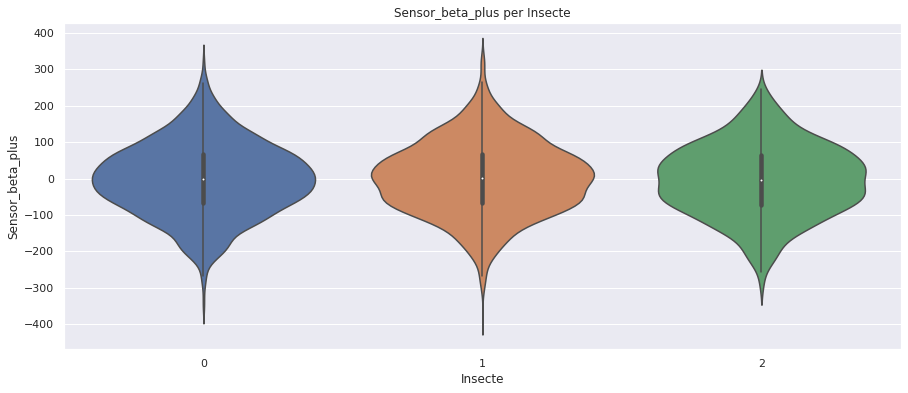

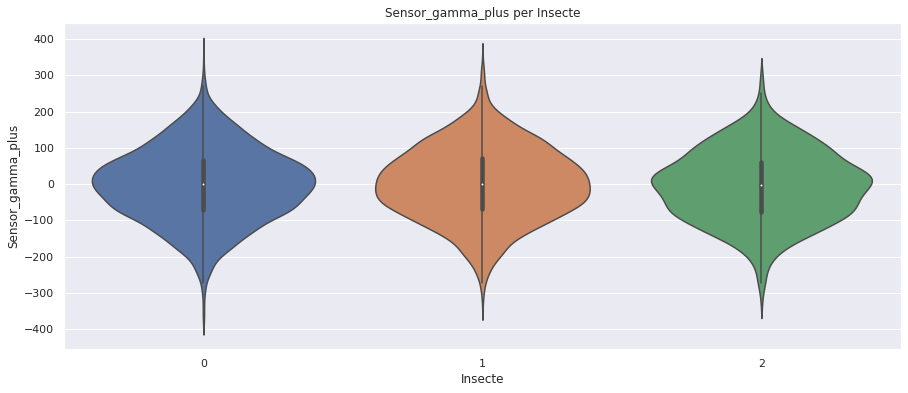

In [23]:
for i in df:
  if (i != 'Hour' and i != 'Minutes' and i != 'Insect'):
    plt.figure(figsize=(15, 6))
    sns.set_theme(style="darkgrid")
    ax = sns.violinplot(x=df['Insect'], y=df[i])
    plt.title(i + " per Insecte")
    ax.set_xlabel("Insecte")
    ax.set_ylabel(i)
    plt.show()

Realitzem un anàlisi per veure les característiques d'aquests i com estan distribuits els valors amb un violinplot per categoria i insecte.

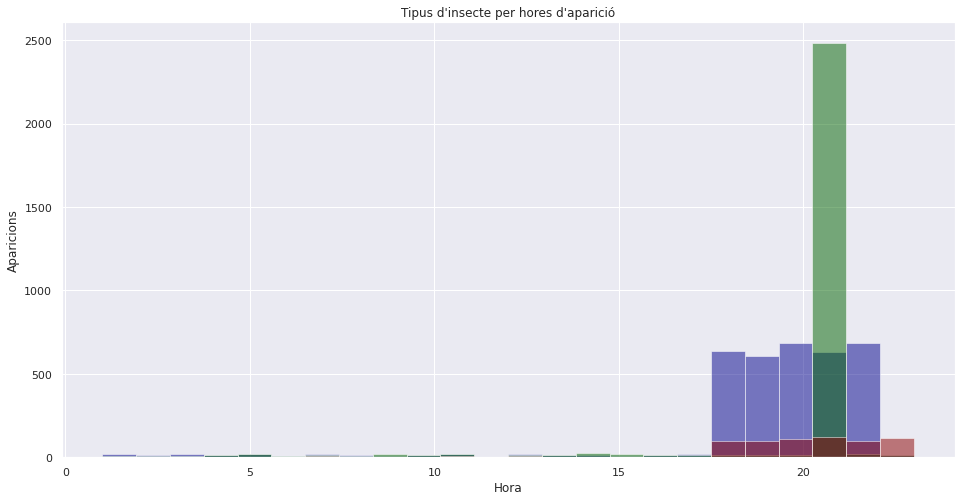

In [24]:
plt.figure(figsize=(16,8))
plt.title("Tipus d'insecte per hores d'aparició")
plt.xlabel("Hora")
plt.ylabel("Aparicions")
plt.hist(s0['Hour'], color='darkblue', alpha=0.5, bins=24)
plt.hist(s1['Hour'], color='darkgreen', alpha=0.5, bins=24)
plt.hist(s2['Hour'], color='darkred', alpha=0.5, bins=24)
plt.show()

Observem que les hores que més apareixen els insectes tipus 2 és a les 21 hores, l'únic insecte que apareix a les 23 hores és el tipus 3 tot i que apareix en totes les franjes nocturnes, i el tipus 1 està en totes les hores entre les 18 i les 22.

# 2. Prediccions

Realitzarem 2 prediccions, GradientBoosting i un RandomForest.


## 2.1. Gradient Boosting

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
X = df.drop(columns = 'Insect')
y = df['Insect']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

gboosting

In [28]:

gbc = GradientBoostingClassifier()

In [29]:
params = {'learning_rate': [0.01,0.02,0.03],
          'subsample'    : [0.9, 0.5, 0.2],
          'n_estimators' : [100,500,1000],
          'max_depth'    : [4,6,8]
          }

In [33]:
random_gbc= RandomizedSearchCV(estimator=gbc, param_distributions = params, n_iter=100, cv = 3, n_jobs=-1)
random_gbc.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.02, 0.03],
                                        'max_depth': [4, 6, 8],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': [0.9, 0.5, 0.2]})

In [34]:
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n",random_gbc.best_estimator_)
print("\n The best score across ALL searched params:\n",random_gbc.best_score_)
print("\n The best parameters across ALL searched params:\n",random_gbc.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 GradientBoostingClassifier(learning_rate=0.01, max_depth=8, n_estimators=1000,
                           subsample=0.5)

 The best score across ALL searched params:
 0.8932166071247805

 The best parameters across ALL searched params:
 {'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 8, 'learning_rate': 0.01}


In [52]:
bm_gb = GradientBoostingClassifier(subsample=0.5, n_estimators=1000, max_depth=8, learning_rate=0.01)

In [58]:
bm_gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=8, n_estimators=1000,
                           subsample=0.5)

In [59]:
y_pred_gb = bm_gb.predict(X_test)

In [60]:
from sklearn.metrics import f1_score

f1_gb = f1_score(y_test, y_pred_gb, average='macro')*100
f1_gb

86.64145406305721

**EL VALOR DE F1 SCORE AVERAGE MACRO ÉS DE 86,64%**

## 2.2. Random Forest

In [61]:
rf = RandomForestClassifier(random_state=42)
param_grid = {"max_depth": range(6, 13), "n_estimators": [10, 50, 100, 200]}

In [62]:
random_rf = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, cv = 5)
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': range(6, 13),
                                        'n_estimators': [10, 50, 100, 200]})

In [63]:
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n",random_rf.best_estimator_)
print("\n The best score across ALL searched params:\n",random_rf.best_score_)
print("\n The best parameters across ALL searched params:\n",random_rf.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=12, random_state=42)

 The best score across ALL searched params:
 0.8757142857142857

 The best parameters across ALL searched params:
 {'n_estimators': 100, 'max_depth': 12}


In [64]:
bm_rf = RandomForestClassifier(n_estimators=100, max_depth=12)

In [65]:
bm_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=12)

In [66]:
y_pred_rf = bm_rf.predict(X_test)

In [68]:
from sklearn.metrics import f1_score

f1_rf = f1_score(y_test, y_pred_rf, average='macro')*100
f1_rf

81.53127540486975

**EL VALOR DE F1 SCORE AVERAGE MACRO ÉS DE 81,53%**

## 2.3. BEST MODEL

El millor model és el GradientBoosting amb un F1-score macro de 86,64%.